In [1]:
import org.apache.spark.sql.functions._
import org.apache.spark.ml.linalg.Vectors
import org.apache.spark.ml.linalg.DenseVector
import org.apache.spark.ml.feature.StandardScaler
import org.apache.spark.ml.feature.PCA
import org.apache.spark.ml.clustering.KMeans
import Image.Processing._
import breeze.plot._
import convert.jfc.tohtml

## Load images and transform them into feature vectors

In [2]:
var data = Vector.empty[(Double, org.apache.spark.ml.linalg.Vector)]

var path = ""

for(j <- 1 to 10)
{
  for(k <- 1 to 10)
    {

    val J = j.toString
    val K = k.toString

    if( j <= 9 & k <= 9 ){
    path = "../Datasets/Hand_drawn_characters/Sample00" + J + "/img00" + J + "-00" + K + ".png"
    } else if( j <= 9 & k > 9 ){
    path = "../Datasets/Hand_drawn_characters/Sample00" + J + "/img00" + J + "-0" + K + ".png"
    } else if( j > 9 & k <= 9 ){
    path = "../Datasets/Hand_drawn_characters/Sample0" + J + "/img0" + J + "-00" + K + ".png"
    } else{
    path = "../Datasets/Hand_drawn_characters/Sample0" + J + "/img0" + J + "-0" + K + ".png"
    }

    val image = readImage(path)

    val acimage = autoCropImage(image)

    val rimage = resizeImage(acimage, 10, 15)

    val m = covertToArray(rimage).max

    val V = Vectors.dense(covertToArray(rimage).map(x => x - m)) //5400 d densevector

    data = data :+ (j.toDouble,V)

    }
}

data = Vector((1.0,[0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,-1.6777215E7,-1.6777215E7,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0...


Vector((1.0,[0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,-1.6777215E7,-1.6777215E7,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,0.0,0.0,-1.6777215E7,-1.6777215E7,0.0,0.0,0.0,-1.6777215E7,-1.6777215E7,-1.6777215E

## Create Dataframe

In [3]:
val df = data.toDF("label","features")
df.show(10)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|[0.0,0.0,0.0,0.0,...|
|  1.0|[0.0,0.0,0.0,-1.6...|
|  1.0|[0.0,0.0,-1.67772...|
|  1.0|[0.0,0.0,0.0,-1.6...|
|  1.0|[0.0,0.0,-1.67772...|
|  1.0|[0.0,0.0,0.0,-1.6...|
|  1.0|[0.0,0.0,-1.67772...|
|  1.0|[0.0,0.0,0.0,-1.6...|
|  1.0|[0.0,0.0,0.0,-1.6...|
|  1.0|[0.0,0.0,0.0,0.0,...|
+-----+--------------------+
only showing top 10 rows



df = [label: double, features: vector]


[label: double, features: vector]

## Scale the features

In [4]:
val scaler = new StandardScaler().
  setInputCol("features").
  setOutputCol("scaledFeatures")

scaler = stdScal_1658f5f73327


stdScal_1658f5f73327

In [5]:
val df_s = scaler.fit(df).transform(df)

[Stage 0:>                                                          (0 + 0) / 4]

df_s = [label: double, features: vector ... 1 more field]


[label: double, features: vector ... 1 more field]

## Dimensionality Reduction with PCA

In [6]:
val pca = new PCA().
    setInputCol("scaledFeatures").
    setOutputCol("pcaFeatures").
    setK(30)

pca = pca_e29071ed5e90


pca_e29071ed5e90

In [7]:
val df_p = pca.fit(df_s).transform(df_s)

df_p = [label: double, features: vector ... 2 more fields]


[label: double, features: vector ... 2 more fields]

In [8]:
df_p.show(10)

+-----+--------------------+--------------------+--------------------+
|label|            features|      scaledFeatures|         pcaFeatures|
+-----+--------------------+--------------------+--------------------+
|  1.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|[8.77360514401763...|
|  1.0|[0.0,0.0,0.0,-1.6...|[0.0,0.0,0.0,-1.9...|[8.75709769423354...|
|  1.0|[0.0,0.0,-1.67772...|[0.0,0.0,-2.17124...|[3.76350195416560...|
|  1.0|[0.0,0.0,0.0,-1.6...|[0.0,0.0,0.0,-1.9...|[8.48224260782528...|
|  1.0|[0.0,0.0,-1.67772...|[0.0,0.0,-2.17124...|[7.38119036212154...|
|  1.0|[0.0,0.0,0.0,-1.6...|[0.0,0.0,0.0,-1.9...|[11.8496553385502...|
|  1.0|[0.0,0.0,-1.67772...|[0.0,0.0,-2.17124...|[11.7355859809217...|
|  1.0|[0.0,0.0,0.0,-1.6...|[0.0,0.0,0.0,-1.9...|[10.5452493252391...|
|  1.0|[0.0,0.0,0.0,-1.6...|[0.0,0.0,0.0,-1.9...|[3.88914738652943...|
|  1.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|[10.4773711709870...|
+-----+--------------------+--------------------+--------------------+
only s

## Calculate the cost function J(k)

In [9]:
var x = new Array[Double](5)
var y = new Array[Double](5)

for(k <- 8 to 12){

  val kmeans = new KMeans().setK(k).setFeaturesCol("pcaFeatures")
  val model = kmeans.fit(df_p)
  val J = model.computeCost(df_p)

  x(k-8) = k.toDouble
  y(k-8) = J
}

x = Array(8.0, 9.0, 10.0, 11.0, 12.0)
y = Array(7819.173292594525, 7469.272617321114, 7606.831884806715, 7523.993527165438, 7093.967111397715)


[7819.173292594525, 7469.272617321114, 7606.831884806715, 7523.993527165438, 7093.967111397715]

## Plot J(k)

In [10]:
val fig = Figure()
val plt = fig.subplot(0)

fig = breeze.plot.Figure@2bd6ba1c
plt = breeze.plot.Plot@65242a09


breeze.plot.Plot@65242a09

In [11]:
plt += plot(x, y, name = "points", colorcode="red")
plt.legend = true
plt.title = "Elbow Method"
plt.xlabel = "k"
//plt.xlim(0,10)
plt.ylabel = "J"

plt.legend: Boolean = true
plt.title: String = Elbow Method
plt.xlabel: String = k
plt.ylabel: String = J



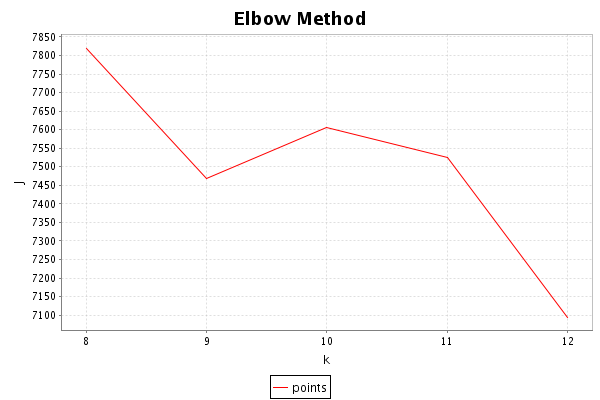

In [12]:
kernel.magics.html(tohtml(plt.chart))